# Tasca M7 T01

* Descripció: 
    Exercicis d'algoritmes de Classificació.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline  

El dataset contiene información sobre el análisis químico de vinos de una misma region de Italia derivados de 3 cultivos diferentes. Los vinos estan clasificados en 3 clases. 

In [61]:
df=pd.read_csv("wineData.txt", names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD', 'Proline'])
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
df['Class'].unique()

array([1, 2, 3])

La variable class consta de 3 tipos, por lo que se trata de una variable categórica. Aunque sea de tipo numérica.

In [16]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


Observamos la media, desviación estandard, valores mínimos y máximos del dataframe.

In [11]:
df.duplicated().sum()

0

No hay duplicados en el dataframe

<AxesSubplot:>

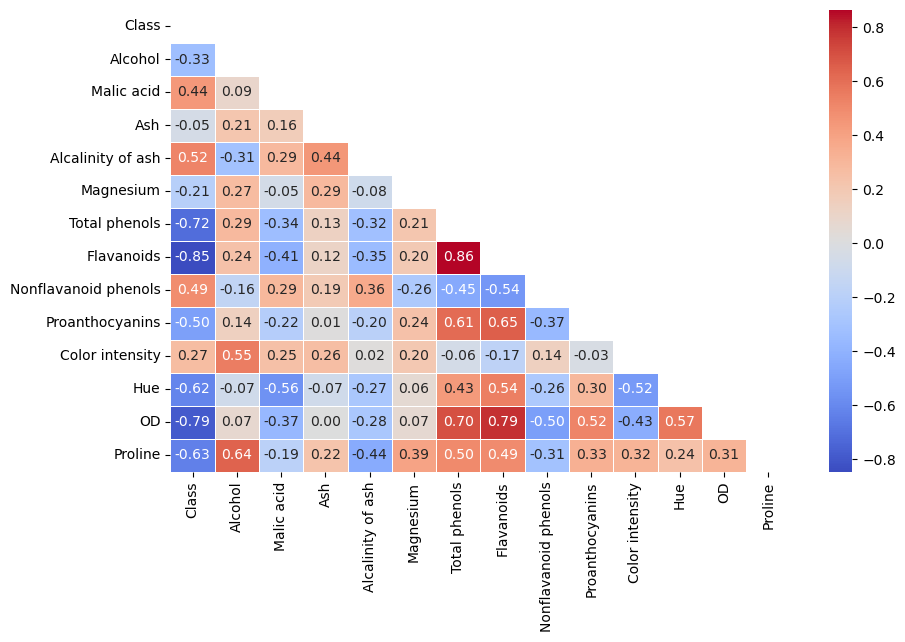

In [62]:
plt.figure(figsize=(10,6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm', mask=mask)

El heatmap nos aporta una matriz de correlación con el número de coeficiente de correlación. -1 seria una correlación negativa perfecta, 1 correlación positiva y 0 no correlación. Rojo intenso o azul intenso indica fuerte correlación, mientras que blanco no correlación. Se destaca:

Una **correlación positiva** indica que, cuando una variable aumenta la otra también lo hace del mismo modo.
 - Correlación positiva intensa (0.86) de Total phenols - Flavanoids.
Los flavonoides son un tipo de polifenol que se encuentra en las uvas y, por ende, en los vinos. Contribuyen a varios aspectos del vino, como el color y el sabor. La correlación negativa intensa que vemos entre el contenido de flavonoides y la clasificación del vino sugiere que los vinos con mayor contenido de flavonoides, es decir, aquellos que son mas astringentes (ese sabor seco en la boca) y son mucho mas oscuros (ideal para los tintos) tienden a tener una calificación más baja.
 
 - Correlación positiva intensa (0.79) de Flavanoids - OD.
La correlación positiva fuerte entre los flavonoides y OD (densidad óptica) sugiere una asociación significativa entre estos dos factores. La densidad óptica es una medida que puede estar relacionada con la concentración de compuestos en el vino. En este caso, podría interpretarse que vinos con mayor contenido de flavonoides tienden a tener una mayor densidad óptica, lo cual podría estar vinculado a características sensoriales específicas o a la concentración de compuestos que contribuyen al cuerpo del vino.

 - Correlación positiva intensa (0.70) de Total phenols - OD.
Similar a la primera correlación, esta indica una fuerte relación positiva entre los fenoles totales y la densidad óptica. Puede interpretarse que vinos con mayor contenido de fenoles totales también tienden a tener una mayor densidad. Esto sugiere que la concentración de fenoles totales en el vino puede influir en su densidad óptica, lo cual puede tener implicaciones en términos de cuerpo y estructura del vino.



En cambio, el contrario sucede cuando se trata de una **correlación negativa**. Cuando class augmenta las otras variables disminuyen en sentido contrario. Cuanto mayor es el número, mayor correlación.

 - Correlación negativa intensa (-0.85) de Class - Flavanoids.
Esto podría interpretarse como que vinos de mayor calidad o categoría tienden a tener menos flavonoides. Podría deberse a que ciertos estilos de vinos de alta calidad no dependen fuertemente de los flavonoides para sus características distintivas.
 - Correlación negativa intensa (-0.79) de Class - OD.
Una baja densidad puede indicar que los vinos de mayor calidad tienden a tener una concentración diferente de compuestos en comparación con vinos de menor calidad. Esto podría relacionarse con la intensidad del color, la presencia de sedimentos u otras características visuales.
 - Correlación negativa intensa (-0.72) de Cass - Total phenols.
Fenoles totales están relacionados con diversos aspectos del vino, como el sabor, aroma y color. La disminución de fenoles totales en vinos de mayor calidad podría sugerir que la complejidad y calidad sensorial de estos vinos no dependen fuertemente de la cantidad total de fenoles.
 - Correlación negativa fuerte (-0.63) de Class - Proline.
La proline es un aminoácido que puede afectar el sabor del vino. Una disminución de la concentración de proline en vinos de mayor calidad podría indicar que estos vinos no dependen fuertemente de este componente específico para su perfil sensorial.

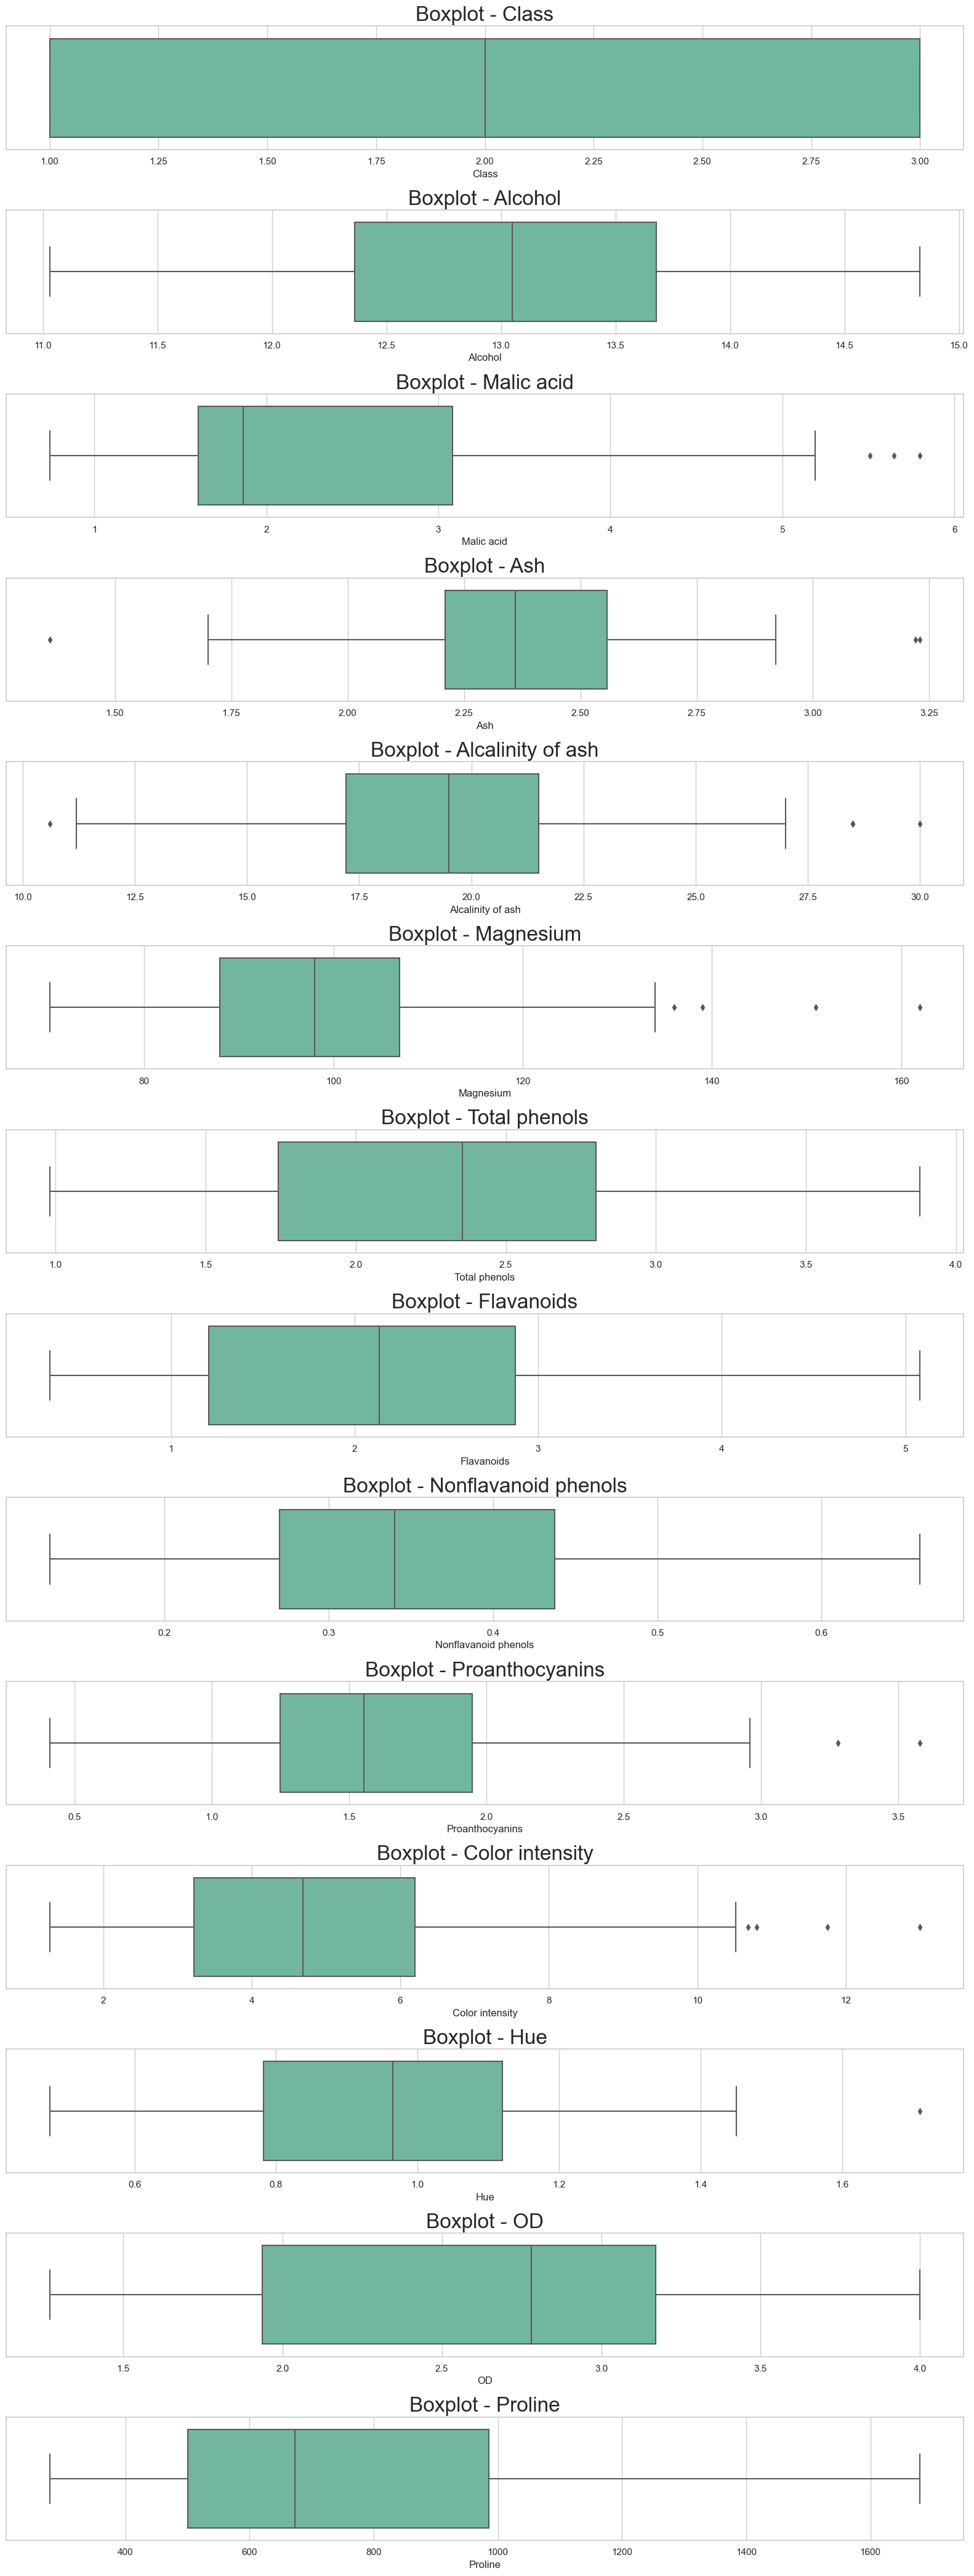

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplots
num_rows = len(df.columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(16, 3*num_rows))
palette = sns.color_palette("Set2")

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], palette=palette) 
    axes[i].set_title(f'Boxplot - {column}' ,fontsize=24)

plt.tight_layout()
plt.show()


Observando la muestra a través de una visualización con boxplot, se detecta algunas variables con outliers. 
Además la varibale Class, como ya se ha mencionado anteriormente es en realidad categorica porque únicamente puede ser 1, 2 o 3.
Lo interesante en este gráfico es averiguar las variables con outliers:
- Variables con outliers: Color intensity, Hue, Proanthocyanins, Ash, Malic acid, Alcalinity of ash, Magnesium.
- Variables sin outliers:  Nonflavanoid phenols, Flavanoids, OD, Total phenols, Proline, Alcohol. 


In [63]:
#Se dividen los datos en conjuntos de entrenamiento y prueba
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

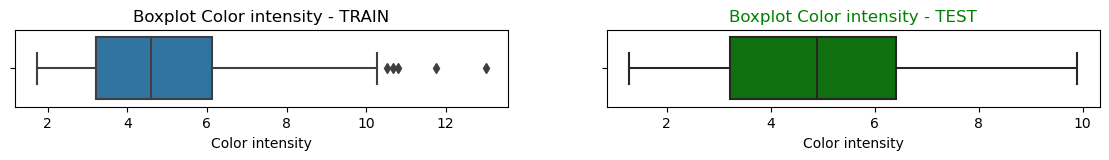

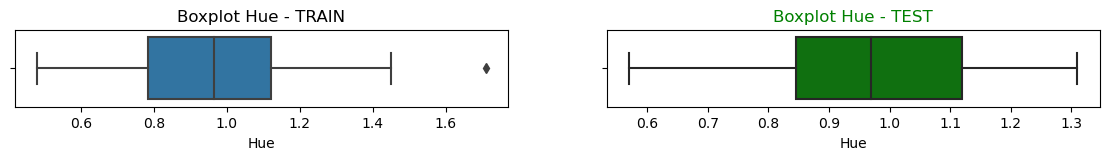

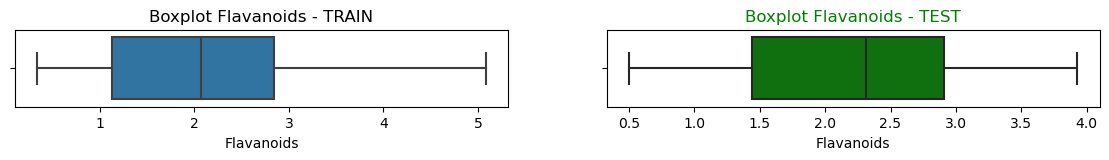

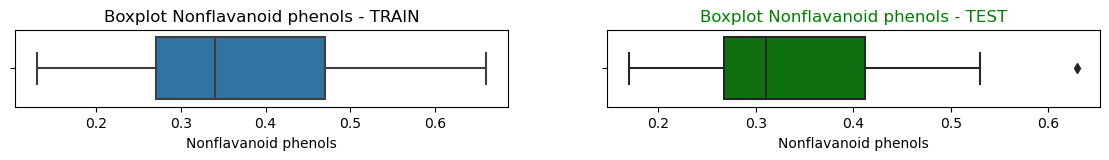

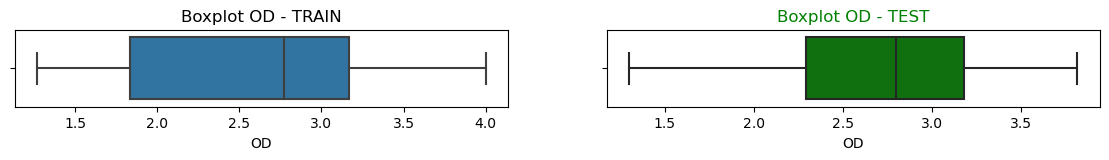

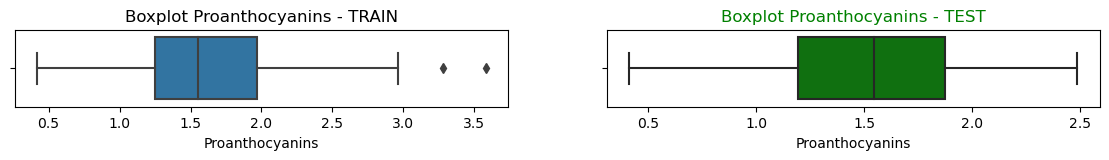

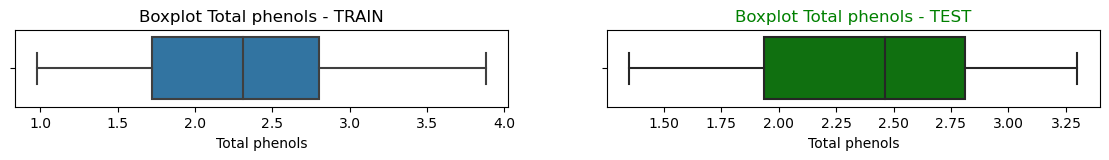

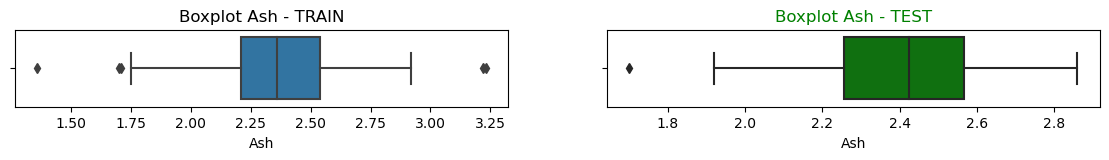

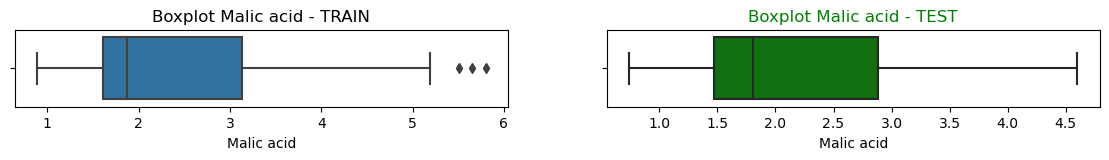

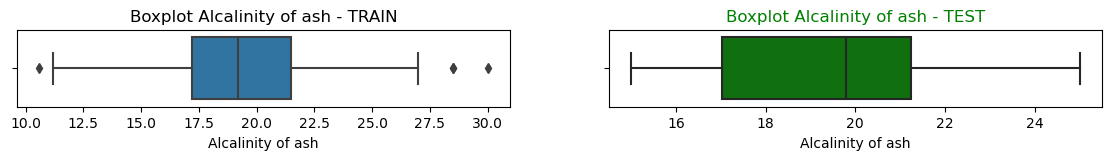

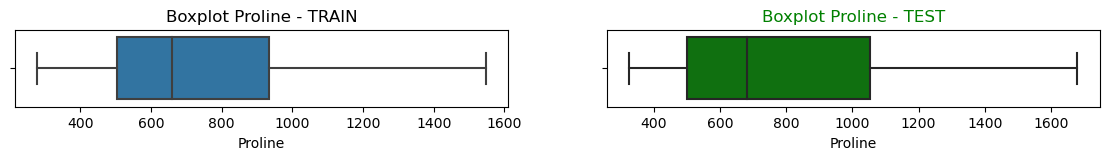

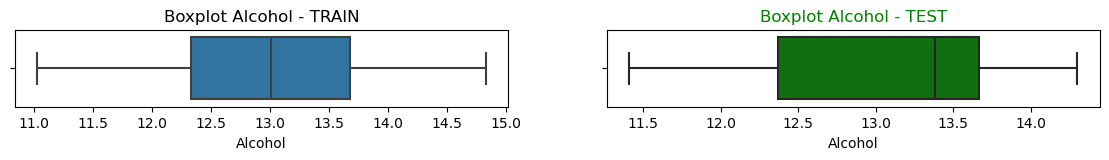

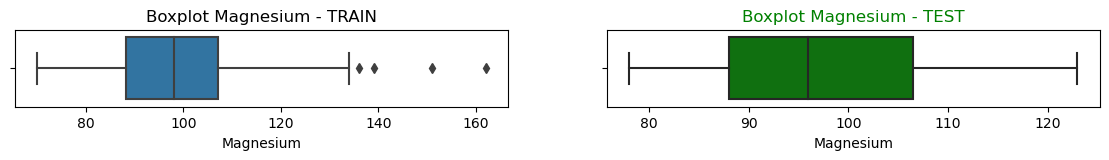

In [40]:
# lista de variables en común entre TRAIN y TEST
common_variables = set(X_train.columns).intersection(X_test.columns)

# Iterar sobre las variables
for variable in common_variables:
    plt.figure(figsize=(14, 1))

    plt.subplot(1, 2, 1)
    sns.boxplot(X_train[variable]);
    plt.title(f'Boxplot {variable} - TRAIN')
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(X_test[variable], color='green');
    plt.title(f'Boxplot {variable} - TEST', color='green')
    plt.xlabel(variable)

Observamos que las variables de Train en azul y test en verde. Como esperamos, las variables tienen las mismas distribuciones en train y en test. Algunos rangos se ven un poco alterados, pero eso entra dentro de la normalidad, ya que en las variables test la muestra siempre es menor que en la de train. Además la mediana en ambos casos se mantiene similar.

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


En este caso haremos uso de los modelos de clasificación puesto que la variable a predecir es categorica y no continua. Dos de los modelos utilizados para la clasificación multiclase son: SVM y XGBoost.
Así que los utilizaremos para predecir las clases de vino.

In [128]:
from sklearn.svm import SVC

#iniciar modelo
model_svm = SVC()
model_svm.fit(X_train, y_train)

#Realizar predicciones
predictions_svm = model_svm.predict(X_test)

# Evaluar el rendimiento
precision_svm = precision_score(y_test, predictions_svm, average='weighted')
print(f'Precision del modelo SVC: {precision_svm}')

Precision del modelo SVC: 0.801058201058201


Se ha iniciado el modelo de clasificación SVM con una precisión del 80%.

In [129]:
import xgboost as xgb

# Restar 1 a las etiquetas de clase porque XGBoost asume que las clases empezando desde 0.
y_train_corrected = y_train - 1
y_test_corrected = y_test - 1

# Crear e inicializar el clasificador XGBoost
xgb_model = xgb.XGBClassifier()

# Entrenar el modelo con las etiquetas corregidas
xgb_model.fit(X_train, y_train_corrected)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

precision_xgb = precision_score(y_test_corrected, y_pred, average='weighted')
print(f'Precision del modelo XGBoost: {precision_xgb}')

Precision del modelo XGBoost: 0.9513888888888888


El modelo XGBoost tiene una precisión del 95% siendo un resultado muy bueno, mejorando la puntuación del SVM.

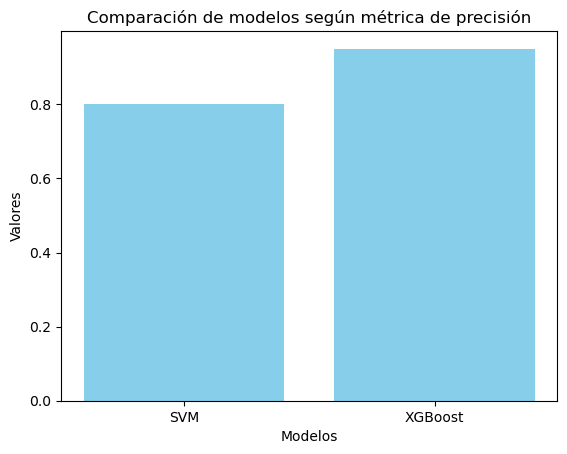

In [35]:
valores = precision_svm, precision_xgb

# Crear el gráfico de barras
plt.bar(resultado['Modelo'], valores, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Valores')
plt.title('Comparación de modelos según métrica de precisión')


plt.show()


Gráficamente se aprecia como el valor de precisión de el **modelo XGBoost** es mucho mayor. 
La conclusión con está métrica es que el modelo XGBOOST obtiene hasta el momento mejores resultados  por lo que será el modelo más adecuado para nuestros datos.

# Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

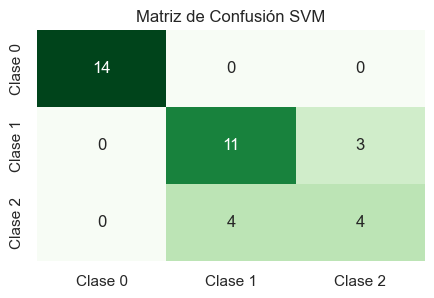

Accuracy del modelo SVM: 0.81
Precision del modelo SVM: 0.8
Recall del modelo SVM: 0.81
F1 del modelo SVM: 0.8
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.73      0.79      0.76        14
           3       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



In [130]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluar el rendimiento SVM
accuracy_svm = accuracy_score(y_test, predictions_svm).round(2)
precision_svm = precision_score(y_test, predictions_svm, average='weighted').round(2)
recall_svm = recall_score(y_test, predictions_svm, average='weighted').round(2)
f1_svm = f1_score(y_test, predictions_svm, average='weighted').round(2)


#Matriz confusión
confusion_svm = confusion_matrix(y_test, predictions_svm)

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión SVM')
plt.show()

print(f'Accuracy del modelo SVM: {accuracy_svm}')
print(f'Precision del modelo SVM: {precision_svm}')
print(f'Recall del modelo SVM: {recall_svm}')
print(f'F1 del modelo SVM: {f1_svm}')

print(classification_report(y_test, predictions_svm))

En este apartado se evalua el rendimiento del modelo SVC con diferentes métricas:

**Matriz de confusión**
Muestra las predicciones correctas y las predicciones incorrectas del modelo. En este caso aparecen segun la clase.  
* En la clase 0, 14 de las predicciones son correctas.
* En la clase 1, 11 predicciones son correctas. 3 son un falso positivo de la clase 2.
* En la clase 2, 4 son correctas, 4 son falsos positivos de la clase 1.

Por lo que los datos de predicción del modelo SVM, deberían ser mejorables.

**Accuracy (Exactitud): 0.81**
De todas las prediccinoes que se hicieron, el 81% de las predicciones del modelo fueron correctas. Por lo que el resultado es bueno. 

**Precision (Precisión): 0.8**
Consiste en la proporción de las predicciones correctas dividida por el total. En este caso, significa que de las predicciones positivas que se hicieron, el 80% de las predicciones positivas fueron correctas. Considerando una precisión bastante buena.

**Recall (sensitivity or true positive rate): 0.81**
El recall se focaliza en como de bueno es el modelo en encontrar todos los positivos. Coge los verdaderos positivos y los divide entre verdaderos positivos y falsos negativos. El modelo identificó correctamente el 81% de todas las instancias que se debían predecir como positivas correctamente en la clase positiva.

**F1-Score: 0.8**
El F1-Score tiene en cuenta la precisión y recall. Es útil cuando hay un desequilibrio entre las clases, aunque en el df estaban bastante igualadas. En este caso, el F1-Score es también del 80%, lo que sugiere un buen equilibrio entre precision and recall.

Además se muestra un informe detallado de varias métricas de clasificación para cada clase. Además de las métricas explicadas anteriormente, incluye  El informe incluye el promedio macro y ponderado de estas métricas. 
**Promedio macro ('macro avg'):** Es el promedio no ponderado de las métricas para todas las clases. En este caso es de un 0.77, 0.76, 0.76 respectivamente, siendo un promedio mejorable.
**Promedio ponderado ('weighted avg'):** Es el promedio ponderado por el soporte de las métricas para todas las clases. Se calcula tomando el promedio ponderado de las precisiones, recalls y f1-scores, donde el peso de cada clase es proporcional a su soporte. 0.80,0.81 y 0.80.

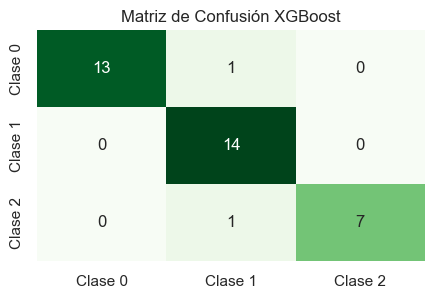

Accuracy del modelo XGBoost: 0.94
Precision del modelo XGBoost: 0.95
Recall del modelo XGBoost: 0.94
F1 del modelo XGBoost: 0.94
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [131]:
#Evaluar rendimiento XGBoost
accuracy_xgb = accuracy_score(y_test_corrected, y_pred).round(2)
precision_xgb = precision_score(y_test_corrected, y_pred, average='weighted').round(2)
recall_xgb = recall_score(y_test_corrected, y_pred, average='weighted').round(2)
f1_xgb = f1_score(y_test_corrected, y_pred, average='weighted').round(2)

#Matriz confusión
confusion_xgb = confusion_matrix(y_test_corrected, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión XGBoost')
plt.show()


# Imprimir las métricas
print(f'Accuracy del modelo XGBoost: {accuracy_xgb}')
print(f'Precision del modelo XGBoost: {precision_xgb}')
print(f'Recall del modelo XGBoost: {recall_xgb}')
print(f'F1 del modelo XGBoost: {f1_xgb}')

print(classification_report(y_test_corrected, y_pred))

 **Matriz de confusión**
Muestra las predicciones correctas y las predicciones incorrectas del modelo. En este caso aparecen segun la clase.  
* En la clase 0, 13 de las predicciones son correctas;con 1 falso positivo en la clase 1.
* En la clase 1, el total de las 14 predicciones son correctas. No hay falsos positivos.
* En la clase 2, el total de las 7 predicciones son correctas. con 1 falso positivo.

Por lo que los datos de predicción del modelo XGBoost son superiores al SVM, con unas predicciones más correctas.

**Accuracy (Exactitud): 0.94**
De todas las prediccinoes que se hicieron, el 94% de las predicciones del modelo fueron correctas. Por lo que el resultado es muy bueno. 

**Precision (Precisión): 0.95**
Consiste en la proporción de las predicciones correctas dividida por el total. En este caso, significa que de las predicciones positivas que se hicieron, el 95% de las predicciones positivas fueron correctas. Considerando una precisión excelente.

**Recall (sensitivity or true positive rate): 0.94**
El recall se focaliza en como de bueno es el modelo en encontrar todos los positivos. Coge los verdaderos positivos y los divide entre verdaderos positivos y falsos negativos. El modelo identificó correctamente el 94% de todas las instancias que se debían predecir como positivas correctamente en la clase positiva. Obteniendo un recall muy bueno.

**F1-Score: 0.97**
El F1-Score tiene en cuenta la precisión y recall. Es útil cuando hay un desequilibrio entre las clases, aunque en el df estaban bastante igualadas. En este caso, el F1-Score es también del 97%, lo que sugiere un buen equilibrio entre precision and recall. Significativamente muy buen f1 score.

El informe de clasificación proporciona detalles sobre la precisión, recuperación y F1-Score para cada clase individual (0, 1, 2, 3). En este caso aparece también la clase 0, porque en el modelo XGBoost, requiere que las clases empiezen por 0, pero en nuestro caso empezaban por 1.


Además se muestra un informe detallado de varias métricas de clasificación para cada clase. Además de las métricas explicadas anteriormente, incluye  El informe incluye el promedio macro y ponderado de estas métricas. 

**Promedio macro ('macro avg'):** Es el promedio no ponderado de las métricas para todas las clases. En este caso es de un 0.96, 0.93, 0.94 respectivamente, siendo un promedio mejorable.

**Promedio ponderado ('weighted avg'):** Es el promedio ponderado por el soporte de las métricas para todas las clases. Se calcula tomando el promedio ponderado de las precisiones, recalls y f1-scores, donde el peso de cada clase es proporcional a su soporte. 0.95,0.94 y 0.94.



**En conclusión, el mejor modelo seria el XGBoost porque ha obtenido mejores resultados, teniendo unas predicciones más correctas.**

# Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Como en el Sprint 6 se hará uso de la función GridSearchCV para encontrar los mejores hipermarámetros de los modelos y así aplicarlos por tal de mejorar su predicción.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Inicializar el modelo SVM
model_svm1 = SVC()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(model_svm1, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_svm = grid_search.best_params_
print("Mejores hiperparámetros:", best_params_svm)

Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [17]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
# Inicializar el modelo XGB ()
model_xgb1 = xgb.XGBClassifier()

# Crear un objeto GridSearchCV
grid_search_xgb = GridSearchCV(model_xgb1, param_grid, cv=5, scoring='accuracy', verbose=1)

# Ajustar el modelo a los datos
grid_search_xgb.fit(X_train, y_train_corrected)

# Obtener los mejores hiperparámetros
best_params_xgb = grid_search_xgb.best_params_
print("Mejores hiperparámetros:", best_params_xgb)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


Después de un par de minutos de ejecución, se podrán ajustar los parámetros de XGBoost para optimizar el rendimiento, y veremos si los resultados son mejores que los obtenidos anteriormente. 

In [32]:
from sklearn.metrics import accuracy_score

# Obtener los mejores hiperparámetros para SVM
best_params_svm = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

# Inicializar y entrenar el modelo SVM con los mejores hiperparámetros
model_svm = SVC(**best_params_svm)
model_svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_svm = model_svm.predict(X_test)

# Calcular y mostrar el accuracy score para SVM
accuracy_svm_param = accuracy_score(y_test, predictions_svm)
precision_svm_param = precision_score(y_test, predictions_svm, average='weighted').round(3)

print(f'Accuracy del modelo SVM Hiperparam: {accuracy_svm_param}')
print(f'Accuracy del modelo SVM: {accuracy_svm}')

#Modelo XGBoost mejores hiperparámetros
best_params_xgb = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}

# Inicializar y entrenar el modelo XGB con los mejores hiperparámetros
model_xgb = xgb.XGBClassifier(**best_params_xgb)
model_xgb.fit(X_train, y_train_corrected)
y_pred_xgb = model_xgb.predict(X_test)

# Calcular y mostrar el accuracy score para XGBoost
accuracy_xgb_param = accuracy_score(y_test_corrected, y_pred_xgb).round(3)
print(f'Accuracy del modelo XGBoost hiperparam: {accuracy_xgb_param}')
print(f'Accuracy del modelo XGBoost: {accuracy_xgb}')

Accuracy del modelo SVM Hiperparam: 1.0
Accuracy del modelo SVM: 0.81
Accuracy del modelo XGBoost hiperparam: 1.0
Accuracy del modelo XGBoost: 0.94


In [40]:
# Datos proporcionados
resultados = {
    'Modelo': ['SVM','XGBoost'],'Accuracy': [accuracy_svm, accuracy_xgb], 'Accuracy Hiperparam': [accuracy_svm_param,accuracy_xgb_param]
}

# Crear un DataFrame
resultado = pd.DataFrame(resultados)


resultado

,Modelo,Accuracy,Accuracy Hiperparam
0,SVM,0.81,1.0
1,XGBoost,0.94,1.0


Tras optimizar el rendimiento aplicando los hiperparámetros que más se ajustan a nuestra muestra, ambos incrementaron sus métricas. 
El **modelo SVM** ha mejorado considerablemente su rendimiento, ha pasado de un 0.81 a un 1. Significa una accuracy perfecta, donde el modelo clasifica correctamente todas y cada una de las muestras.

Mientras, **modelo XGBoost** también ha mejorado aplicando los mejores hiperparámetros de 0.94 a 1. Significa una accuracy perfecta, donde el modelo clasifica correctamente todas y cada una de las muestras. Ambos modelos han obtenido una accuracy perfecta.

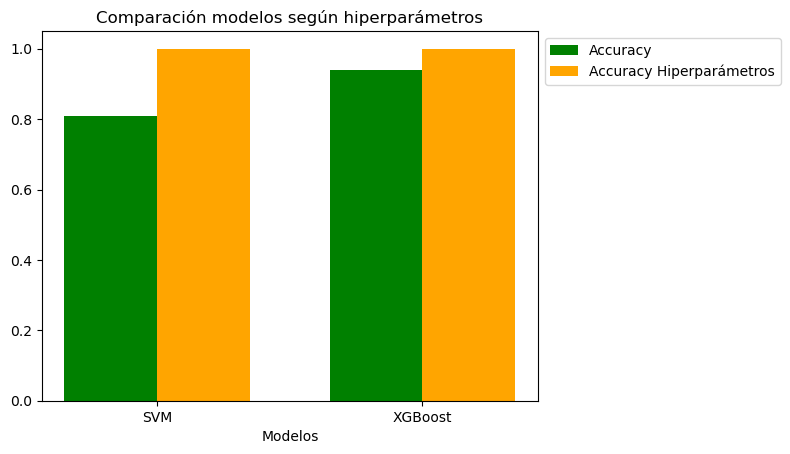

In [57]:
valor1 = accuracy_svm, accuracy_xgb
valor2= accuracy_svm_param,accuracy_xgb_param


# Ancho de las barras
ancho_barra = 0.35

# Coordenadas para las barras
x = np.arange(len(resultado['Modelo']))

# Crear el gráfico de barras agrupadas
plt.bar(x - ancho_barra/2, valor1, width=ancho_barra, label='Accuracy', color='green')
plt.bar(x + ancho_barra/2, valor2, width=ancho_barra, label='Accuracy Hiperparámetros', color='orange')

# Añadir etiquetas
plt.title('Comparación modelos según hiperparámetros')
plt.xticks(np.arange(len(resultado['Modelo'])), resultado['Modelo'])
plt.xlabel('Modelos')
plt.legend(bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

Gráficamente se observa la mejora en la métrica de accuracy en ambos modelos. Sobretodo, en SVM la aplicación de los mejores hiperparámetros para nuestros datos tendrá un mayor impacto. Aunque ambos modelos acaban teniendo una predicción absoluta.

# Exercici 4
 
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

A continuación se pasa a evaluar el rendimiento de cada uno de los modelo de manera más robusta y fiable con la Cross-validation. El propósito principal de la validación cruzada es obtener una estimación más precisa del rendimiento del modelo. En este caso en vez de separar la muestra en train y test se evalua en múltiples divisiones o particiones diferentes del conjunto de datos. Estas particiones son denominadas "folds" o "k-folds". Luego, el modelo se entrena y evalúa varias veces, utilizando diferentes combinaciones.
En una de las configuraciones más comunes, conocida como validación cruzada k-fold, se divide el conjunto de datos en k partes iguales, y el modelo se entrena y evalúa k veces, utilizando cada parte como conjunto de prueba exactamente una vez.

Como ya descubrimos cuales eran los hiperparámetros de cada modelo que mejor se ajustaban, haremos uso de ellos en la cross-validation.

In [89]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Crear listas para almacenar los resultados
scoref1cv_mean = []
scoref1cv_std = []

# Utilizar SVC con los mejores hiperparámetros
svm_mejorado2 = SVC(**best_params_svm)
scoref1_svm_cv = cross_val_score(svm_mejorado2, X, y, cv=5, scoring='f1_macro')
scoref1cv_mean.append(scoref1_svm_cv.mean())
scoref1cv_std.append(scoref1_svm_cv.std())

# Utilizar XGBoost con los mejores hiperparámetros
xgb_mejorado2 = xgb.XGBClassifier(**best_params_xgb)
y_corrected = y - 1
scoref1_xgb_cv = cross_val_score(xgb_mejorado2, X, y_corrected, cv=5, scoring='f1_macro')
scoref1cv_mean.append(scoref1_xgb_cv.mean())
scoref1cv_std.append(scoref1_xgb_cv.std())

print('Folds de Cross-Validation del modelo SVM', scoref1_svm_cv)
print('Folds de Cross-Validation del modelo XGB', scoref1_xgb_cv)


Folds de Cross-Validation del modelo SVM [0.91769115 0.91848596 0.97401299 1.         1.        ]
Folds de Cross-Validation del modelo XGB [0.91636364 0.94515263 0.91989505 1.         1.        ]


In [90]:
# Crear un DataFrame
evaluacionCV = pd.DataFrame({
    'Modelo': ['SVM','XGBoost']})

evaluacionCV['f1_cv'] = scoref1cv_mean
evaluacionCV['f1_std_cv'] = scoref1cv_std

evaluacionCV

,Modelo,f1_cv,f1_std_cv
0,SVM,0.962038,0.037119
1,XGBoost,0.956282,0.037051


La evaluación del modelo XGBoost con Cross-validation también obtiene unos resultados bastante buenos. Con unas predicciones altas. Si observamos detalladamente,tanto la puntuación de f1 como la desviación estandard son un poco mejores en el modelo SVM. 

**En conclusión, el mejor modelo segun la evaluación de Cross-Validation será SVM.**

# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Para ello, primero realizaremos el test de shapiro en el dataframe para ver el tipo de distribución que siguen las variables. Si la distribución es o no gaussiana. 
Luego, aplicaremos una estandarización en base a si las variables tienen o no outliers.

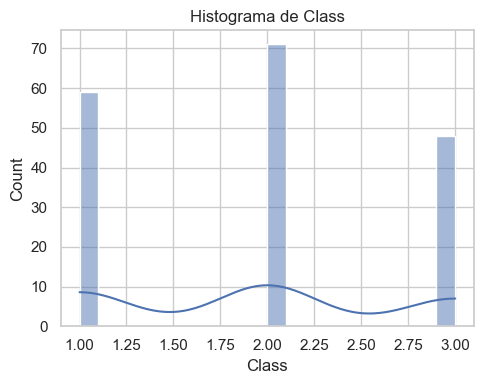

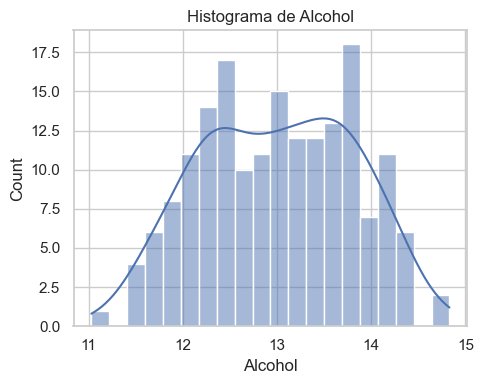

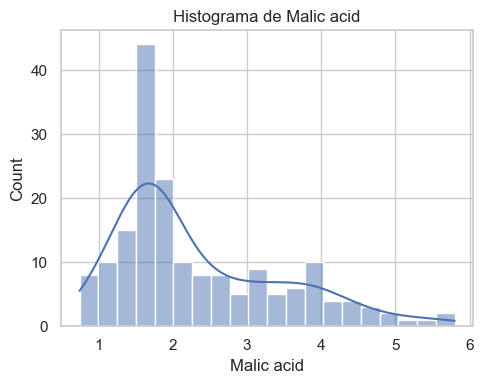

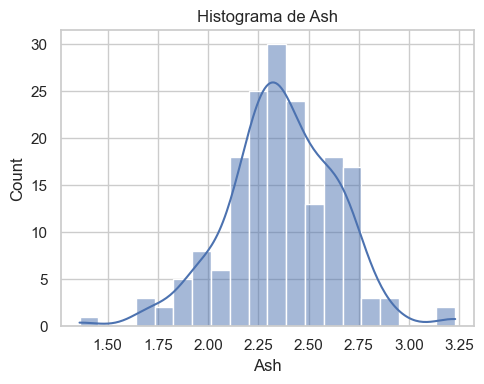

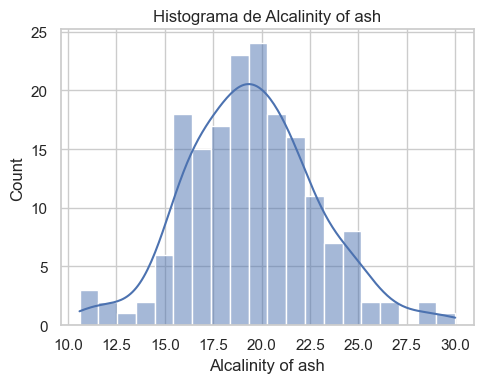

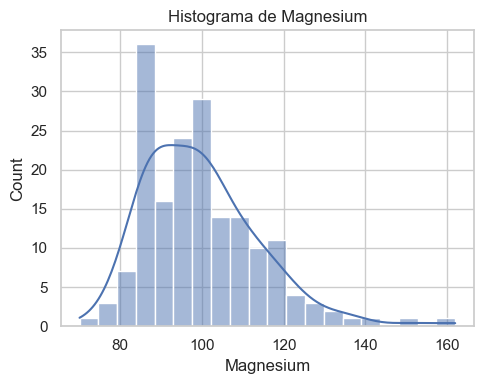

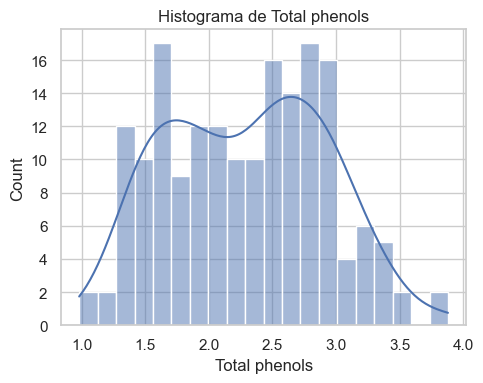

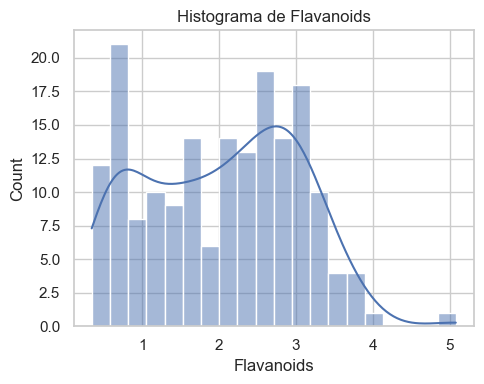

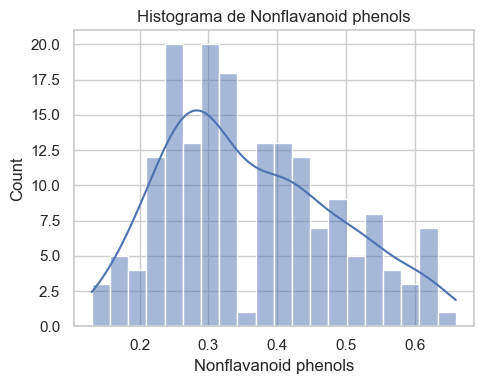

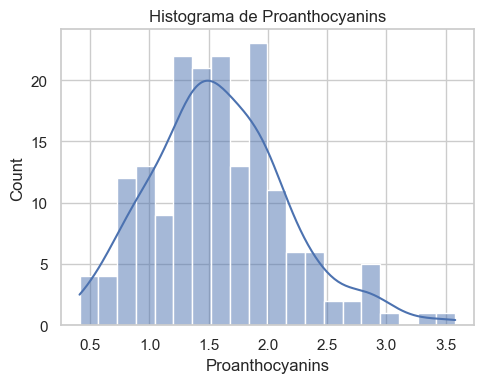

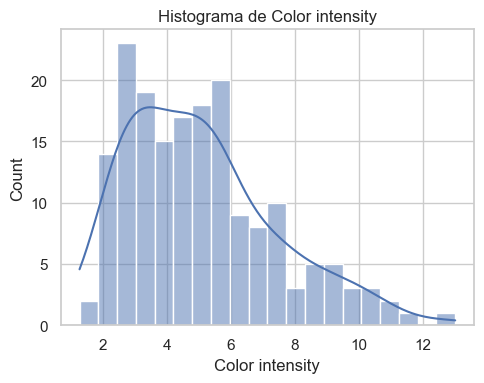

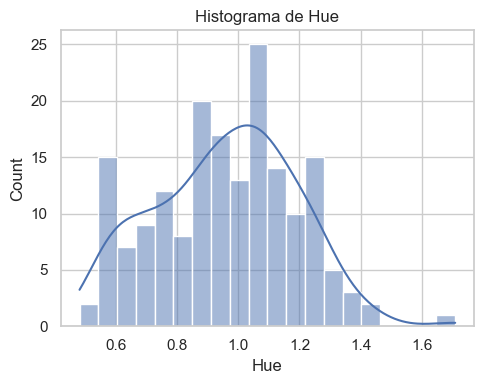

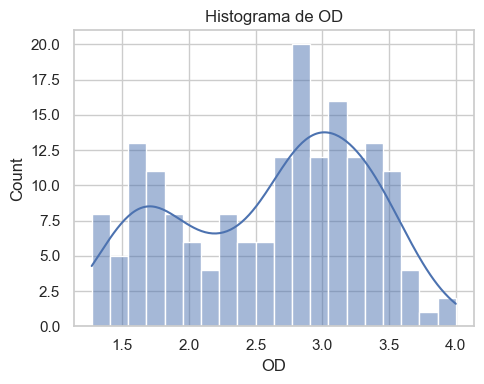

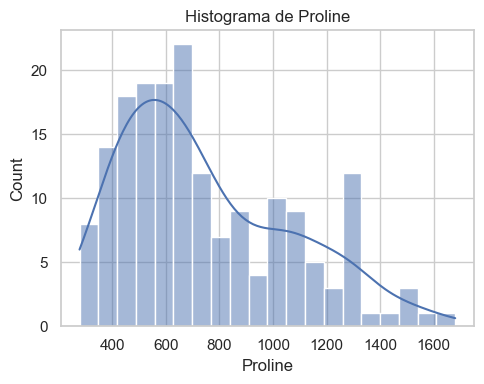

In [146]:

for variable in df.columns:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[variable], kde=True, bins=20)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.tight_layout()
    plt.show() 

Analizando los gráficos visualmente, se detecta que las únicas variables que podrían tener una distribución gaussiana son Alcalinity of ash y histograma of ash, por ello es interesante realizar el test shapiro, y analizar los resultados. El resto son claramente no gaussianas.

In [101]:
from scipy import stats
from scipy.stats import shapiro

for data in df.columns:
    shapiro_test = stats.shapiro(df[data])
    print("La variable", data, "tiene un p-valor de", "{:.3f}".format(shapiro_test.pvalue))
    if shapiro_test.pvalue > 0.05:
        print("La variable", data, " tiene una distribución NORMAL o GAUSSIANA.\n")
    else:
        print("La variable", data, " NO tiene una distribució normal.\n")

La variable Class tiene un p-valor de 0.000
La variable Class  NO tiene una distribució normal.

La variable Alcohol tiene un p-valor de 0.020
La variable Alcohol  NO tiene una distribució normal.

La variable Malic acid tiene un p-valor de 0.000
La variable Malic acid  NO tiene una distribució normal.

La variable Ash tiene un p-valor de 0.039
La variable Ash  NO tiene una distribució normal.

La variable Alcalinity of ash tiene un p-valor de 0.264
La variable Alcalinity of ash  tiene una distribución NORMAL o GAUSSIANA.

La variable Magnesium tiene un p-valor de 0.000
La variable Magnesium  NO tiene una distribució normal.

La variable Total phenols tiene un p-valor de 0.004
La variable Total phenols  NO tiene una distribució normal.

La variable Flavanoids tiene un p-valor de 0.000
La variable Flavanoids  NO tiene una distribució normal.

La variable Nonflavanoid phenols tiene un p-valor de 0.000
La variable Nonflavanoid phenols  NO tiene una distribució normal.

La variable Proanth

El test de shapiro indica que las variables no siguen una distribución normal o gauissiana. Todas menos Alcalinity of ash, la cual si que sigue una distribución normal o gaussiana.

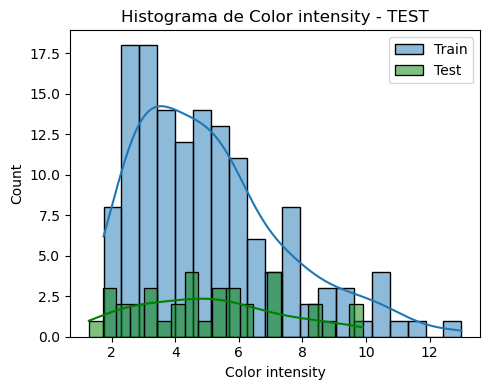

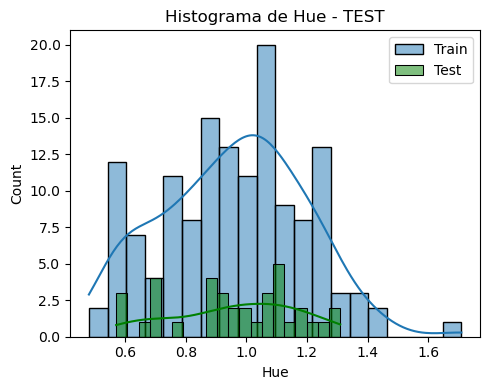

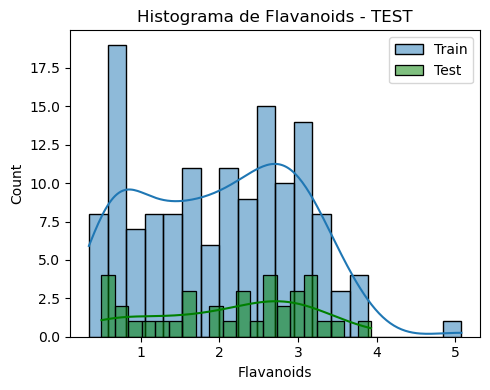

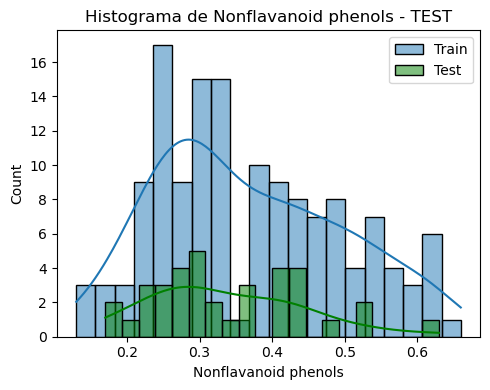

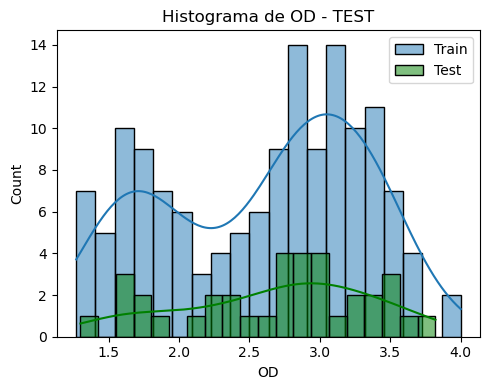

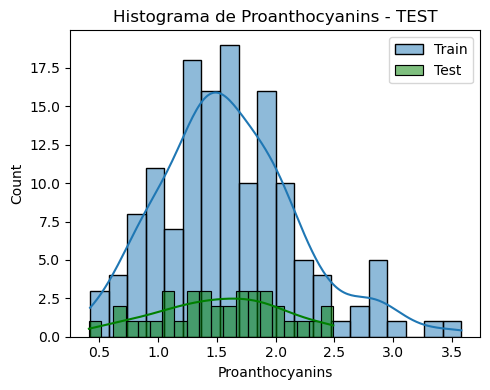

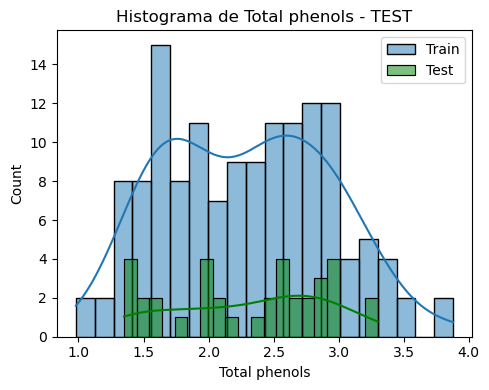

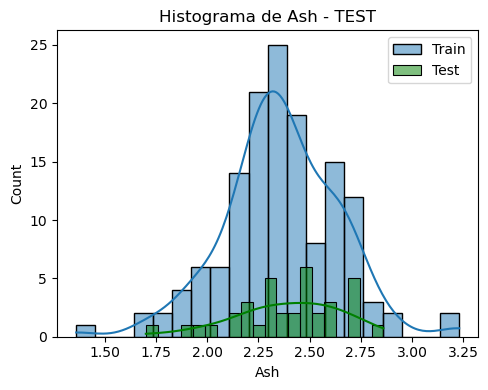

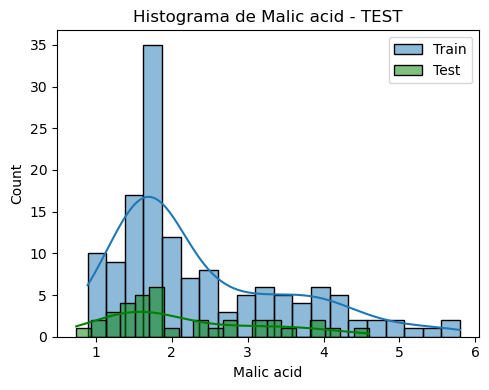

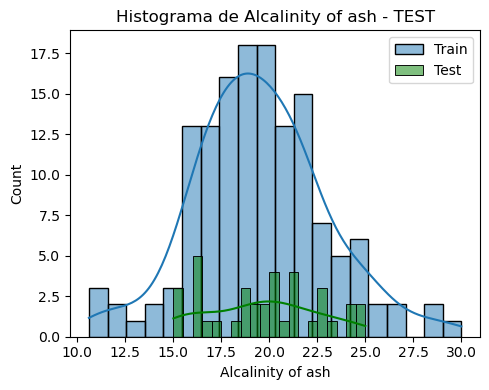

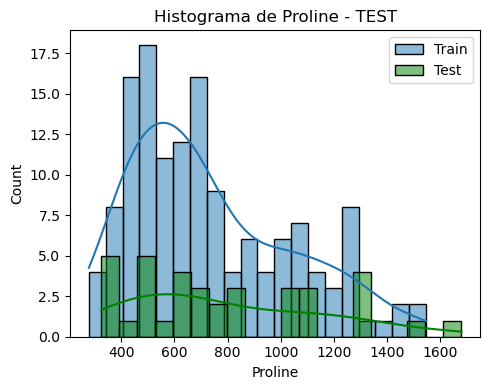

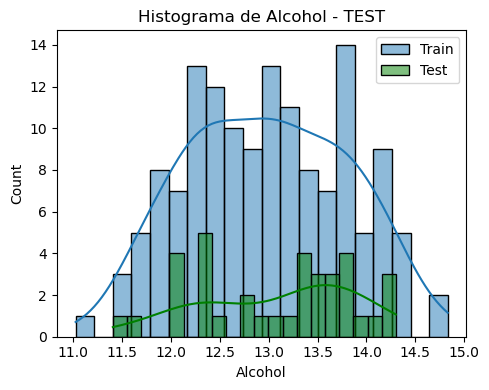

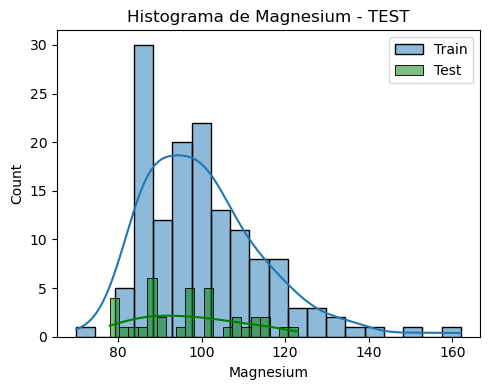

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


# lista de variables en común entre TRAIN y TEST
common_variables = set(X_train.columns).intersection(X_test.columns)

# Iterar sobre las variables y generar histplots para TRAIN y TEST
for variable in common_variables:
    plt.figure(figsize=(5, 4))

    sns.histplot(X_train[variable], kde=True, bins=20, label='Train')
    plt.title(f'Histograma de {variable} - TRAIN')
    plt.xlabel(variable)

    sns.histplot(X_test[variable], kde=True, bins=20, color='green', label='Test')
    plt.title(f'Histograma de {variable} - TEST')
    plt.xlabel(variable)
    
    plt.tight_layout()
    plt.legend()


Distribución Gaussiana: Alcalinity of ash 
Variables con outliers: Color intensity, Hue, Nonflavanoid phenols, Proanthocyanins, Ash, Malic acid, Magnesium
Variables sin outliers: Flavanoids, OD, Total phenols, Proline, Alcohol. 

En esta visualización se muestra las distribuciones de cada una de las variables del dataframe. En azul aparece la muestra de train y en verde la de test.
Visualmente ya se puede detectar como la variable "Alcalinity of ash" sigue una distribución gaussiana. Las demás variables siguen una distribución no gaussiana. En todo momento mantienen la misma distribución el train y el test.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

df2=df.copy()

scaler = StandardScaler()
df2['Alcalinity of ash'] = scaler.fit_transform(df['Alcalinity of ash'].values.reshape(-1, 1))

variables_minmax = ['Flavanoids', 'OD','Total phenols', 'Proline','Alcohol']
minmax_scaler = MinMaxScaler()
df2[variables_minmax] = minmax_scaler.fit_transform(df[variables_minmax])

variables_robust = ['Color intensity', 'Hue','Nonflavanoid phenols', 'Proanthocyanins', 'Ash', 'Malic acid', 'Magnesium']
robust_scaler = RobustScaler()
df2[variables_robust] = robust_scaler.fit_transform(df[variables_robust])


df2

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,-0.358209,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,-0.477612,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,-0.238806,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,-0.597015,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.298507,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,1.074627,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.537313,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.537313,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,1.134328,-0.135714,1.546980,-1.081481,0.128205,0.400856


La estandarización se realiza según si tienen una distribución gaussiana, se aplica StandardScaler(). Si no tienen outliers MinMaxScaler() y si no siguen una distribución gaussiana pero tienen outliers RobustScaler(). 
Se muestra el dataframe estandarizado.

In [21]:
y2 = df2['Class']
X2 = df2.drop(['Class'], axis = 1)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X2, y2, test_size=0.2, random_state=42)

Como anteriormente, se divide el dataframe en train y test.

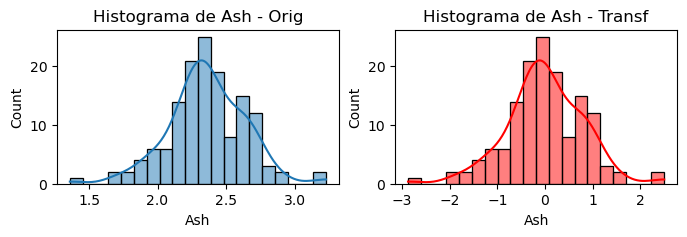

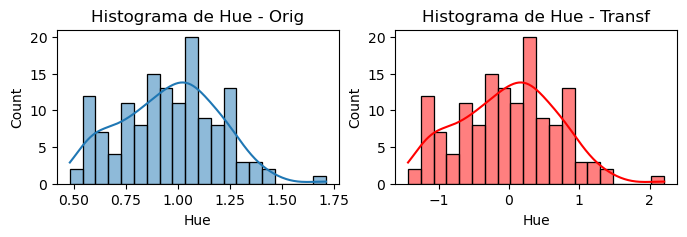

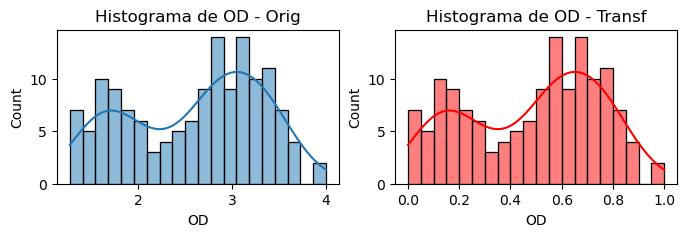

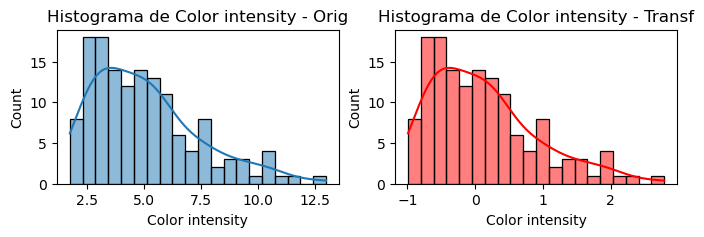

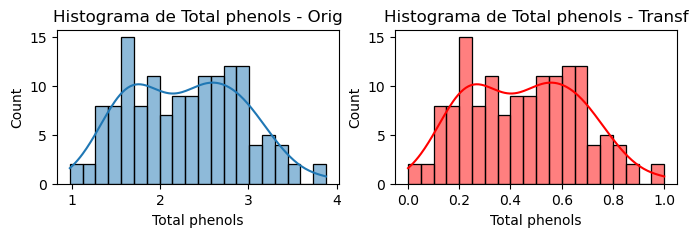

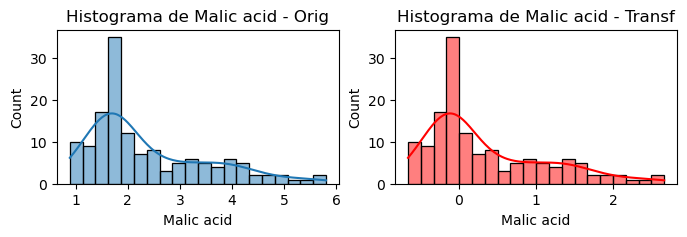

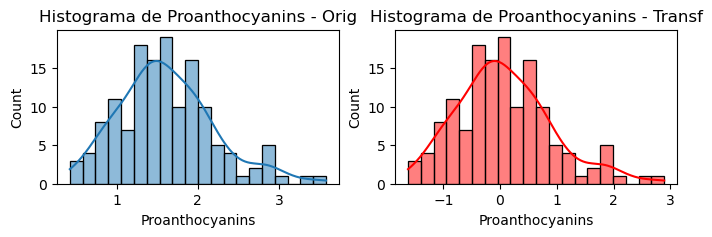

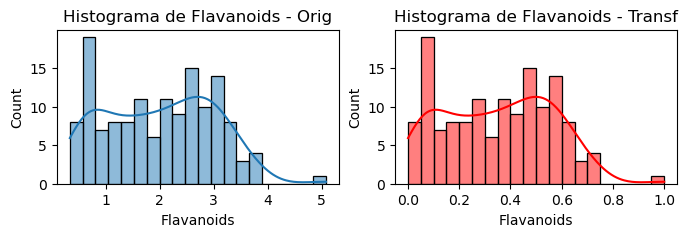

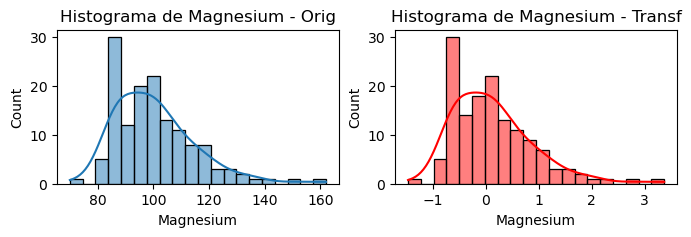

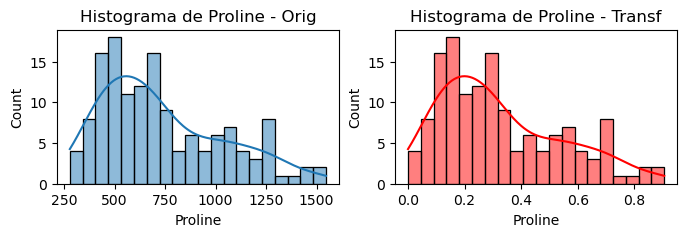

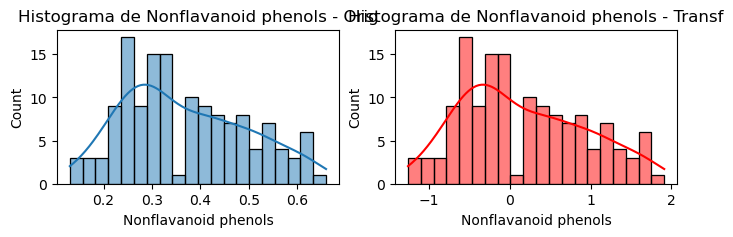

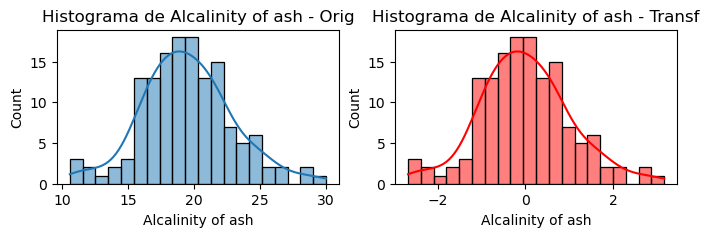

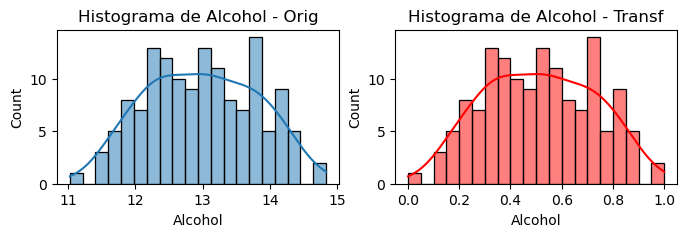

In [22]:
common_variables = set(X_train_scaled.columns).intersection(X_train.columns)

for variable in common_variables:
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 2)
    sns.histplot(X_train_scaled[variable], kde=True, bins=20, color='red')
    plt.title(f'Histograma de {variable} - Transf')
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], kde=True, bins=20)
    plt.title(f'Histograma de {variable} - Orig')
    plt.xlabel(variable)

En esta visualización se puede observar como la transformación de las variables no afecta en la distribución de la muestra original.

Accuracy del modelo SVM estandarizado: 0.917
Accuracy del modelo SVM: 0.81


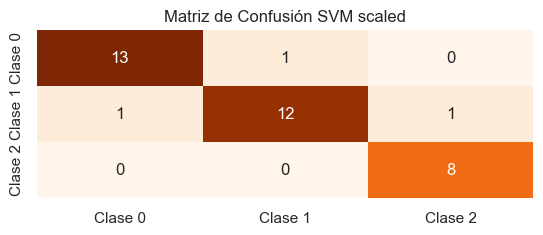

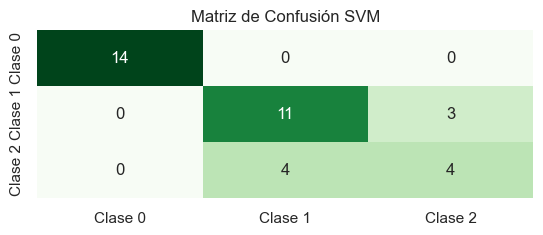

In [136]:
model_svm = SVC(**best_params_svm)
model_svm.fit(X_train_scaled, y_train_scaled)

predictions_svm_scaled = model_svm.predict(X_test_scaled)

precision_svm_scaled = precision_score(y_test_scaled, predictions_svm_scaled, average='weighted')
accuracy_svm_scaled = accuracy_score(y_test_scaled, predictions_svm_scaled).round(3)

print(f'Accuracy del modelo SVM estandarizado: {accuracy_svm_scaled}')
print(f'Accuracy del modelo SVM: {accuracy_svm}')

#Matriz confusión
confusion_svm1 = confusion_matrix(y_test_scaled, predictions_svm_scaled)


plt.subplot(2,1,1)
sns.heatmap(confusion_svm1, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión SVM scaled')
plt.show()

#Matriz confusión
plt.subplot(2,1,2)
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión SVM')
plt.show()

Se evalua el rendimiento del modelo con los datos escalados y se evalua con la métrica de accuracy anterior sin los datos escalados.
En conclusión, el modelo escalado mejora en sus predicciones con la clase 2, y 1. Aunque disminuye en la clase 0, por lo general obtiene mejores resultados.

Accuracy del modelo XGBoost estandarizado: 1.0
Accuracy del modelo XGBoost: 0.94


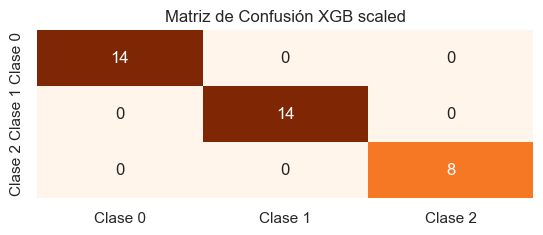

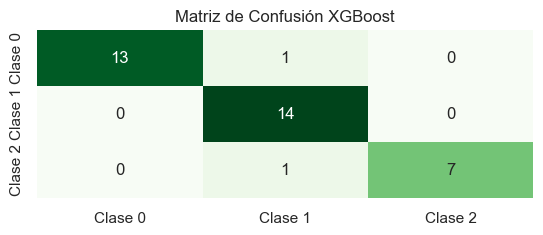

In [137]:
xgb_model1 = xgb.XGBClassifier(**best_params_xgb)
y_train_scaled1 = y_train_scaled - 1
y_test_scaled1 = y_test_scaled - 1

xgb_model1.fit(X_train_scaled, y_train_scaled1)

predictions_xgb_scaled = xgb_model1.predict(X_test_scaled)
accuracy_xgb_scaled = accuracy_score(y_test_scaled1, predictions_xgb_scaled).round(3)

print(f'Accuracy del modelo XGBoost estandarizado: {accuracy_xgb_scaled}')
print(f'Accuracy del modelo XGBoost: {accuracy_xgb}')

#Matriz confusión
confusion_xgb1 = confusion_matrix(y_test_scaled1, predictions_xgb_scaled)

plt.subplot(2,1,1)
sns.heatmap(confusion_xgb1, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión XGB scaled')
plt.show()

plt.subplot(2,1,2)
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión XGBoost')
plt.show()

Los resultados muestran que el modelo XGBoost escalado muestra una mejora en su rendimiento substancial, mejorando sus prediccinoes tanto en la clase 0 como en la 2. Así como obteniendo una accuracy de un 1. Por lo que predice correctamente todas las muestras.

In [138]:
resultado['Accuracy Scaled'] = accuracy_svm_scaled, accuracy_xgb_scaled
resultado

,Modelo,Accuracy,Accuracy Hiperparam,Accuracy Scaled
0,SVM,0.81,1.0,0.917
1,XGBoost,0.94,1.0,1.000


En este dataframe se puede comparar el impacto de los modelos a la hora de realizar sus predicciones.

Por un lado el modelo SVM obtiene sus mejores resultados sin estandarizar los datos y aplicando los mejores hiperparámetros. Mientras que el modelo XGBoost, cuando se aplican los mejores hiperparámetros, se obtiene el mejor rendimiento. Así como cuando se estandarizan los datos se sigue obteniendo un rendimiento absoluto.

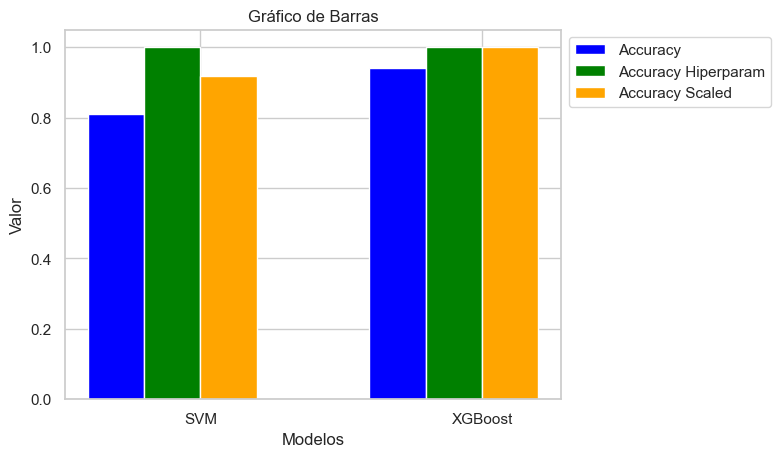

In [148]:
import numpy as np
import matplotlib.pyplot as plt

modelos = resultado['Modelo']
valores = resultado[['Accuracy', 'Accuracy Hiperparam', 'Accuracy Scaled']]

# Colores para las barras
colores = ['blue', 'green', 'orange']

# Ancho de las barras
width = 0.2

# Crear un gráfico de barras
plt.bar(np.arange(len(modelos)) - 1.5 * width, valores['Accuracy'], width=width, color=colores[0], label='Accuracy')
plt.bar(np.arange(len(modelos)) - 0.5 * width, valores['Accuracy Hiperparam'], width=width, color=colores[1], label='Accuracy Hiperparam')
plt.bar(np.arange(len(modelos)) + 0.5 * width, valores['Accuracy Scaled'], width=width, color=colores[2], label='Accuracy Scaled')

# Configuraciones adicionales
plt.xticks(np.arange(len(modelos)), modelos)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Gráfico de Barras')

# Añadir leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Se muestran los resultados gráficamente el rendimiento de ambos modelos, mostrando valores bastante altos.
- El modelo SVM obtuvo sus mejores resultados cuando se aplicaron los mejores hiperarámetros.
- El modelo XGBoost ha obtenido los mejores resultados una vez se ha estandarizaron y se han aplicado los mejores hiperparámetros.

**En conclusión el modelo que mejor se ajusta a nuestra muestra será XGBoost.**